## Step #1: Process clinical data, filter down to time observed and event stage

In [1]:
import pandas as pd
import os
import shutil

# Load manifest
manifest = pd.read_csv("gdc_manifest.2025-06-06.154107.txt", sep="\t")

clinical_data = pd.read_csv("patient_survival_data/nationwidechildrens.org_clinical_patient_lihc.txt", sep="\t", header=1)
followup = pd.read_csv("patient_survival_data/clinical_followup/nationwidechildrens.org_clinical_follow_up_v4.0_lihc.txt", sep="\t", header=1)
clinical_data.drop(0)
followup.drop(0)

,bcr_patient_uuid,bcr_patient_barcode,bcr_followup_barcode,bcr_followup_uuid,form_completion_date,lost_follow_up,radiation_therapy,postoperative_rx_tx,post_op_ablation_embolization_tx,person_neoplasm_cancer_status,vital_status,new_tumor_event_after_initial_treatment,days_to_death,followup_case_report_form_submission_reason,days_to_last_followup
1,B27720A2-E240-413C-A0F1-0B1AF3621DE2,TCGA-2Y-A9GU,TCGA-2Y-A9GU-F69082,FB05E6D4-A090-475A-92A3-DED79D7B91FA,2014-12-29,NO,NO,NO,NO,TUMOR FREE,Alive,NO,[Not Applicable],[Not Available],1939
2,D6C2C6CE-3483-4FE5-AEF6-E40419F728CF,TCGA-2Y-A9GX,TCGA-2Y-A9GX-F69170,4D97DAB1-99B1-40BB-95B1-BB86EDEEFA5F,2014-12-30,NO,NO,NO,NO,WITH TUMOR,Alive,YES,[Not Applicable],[Not Available],2442
3,492FF93F-432B-4B73-8706-632FB2C83EB4,TCGA-2Y-A9H0,TCGA-2Y-A9H0-F69171,D0AC41D4-7565-41E7-8F26-896CE512B5E3,2014-12-30,NO,NO,NO,NO,TUMOR FREE,Alive,NO,[Not Applicable],[Not Available],3675
4,CF7F0473-EAF3-4259-A68E-475A782FC84C,TCGA-2Y-A9H2,TCGA-2Y-A9H2-F69173,6B216173-3374-4246-9636-5FAA0C0B1683,2014-12-30,NO,NO,NO,NO,TUMOR FREE,Alive,NO,[Not Applicable],[Not Available],1731
5,9B69D7F9-38EB-48E1-BDC0-A092A53BC709,TCGA-2Y-A9H3,TCGA-2Y-A9H3-F69086,403D91DF-C0ED-4455-B76C-4CC6AF05042C,2014-12-29,NO,NO,NO,[Discrepancy],TUMOR FREE,Alive,NO,[Not Applicable],[Not Available],1516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,CBB89556-D783-4E70-8DB4-EF53E9A45922,TCGA-ZP-A9D2,TCGA-ZP-A9D2-F65766,ED61A21A-0067-4107-A53B-B3F816EA1B06,2015-1-16,NO,NO,NO,YES,WITH TUMOR,Dead,NO,765,[Not Available],[Not Available]
354,4244912D-8527-410C-A084-A56C55EB1F82,TCGA-ZP-A9D4,TCGA-ZP-A9D4-F57750,843F963C-B2B8-4895-95AE-EB00092EB118,2014-3-28,NO,NO,NO,NO,TUMOR FREE,Alive,NO,[Not Applicable],[Not Available],395
355,7BDC5F86-4D7D-4F1F-BC23-AB51FA9FB947,TCGA-ZS-A9CE,TCGA-ZS-A9CE-F68444,740B3E4A-10D4-452B-8930-41BAF579F2BC,2014-11-18,NO,NO,NO,NO,TUMOR FREE,Alive,YES,[Not Applicable],[Not Available],1241
356,7FE5E2D9-C514-47BC-8387-3F940F7A822D,TCGA-ZS-A9CF,TCGA-ZS-A9CF-F68445,18FD980A-9AE2-4BE1-9C2C-A8C27CE468C5,2014-11-18,NO,NO,NO,NO,TUMOR FREE,Alive,YES,[Not Applicable],[Not Available],2412


In [2]:
survival_data = clinical_data.filter(items=["bcr_patient_barcode","vital_status", "days_to_death", "days_to_last_followup"])
survival_data_followup = followup.filter(items=["bcr_patient_barcode","vital_status", "days_to_death", "days_to_last_followup"])
survival_data_followup.head()

,bcr_patient_barcode,vital_status,days_to_death,days_to_last_followup
0,CDE_ID:2003301,CDE_ID:5,CDE_ID:3165475,CDE_ID:3008273
1,TCGA-2Y-A9GU,Alive,[Not Applicable],1939
2,TCGA-2Y-A9GX,Alive,[Not Applicable],2442
3,TCGA-2Y-A9H0,Alive,[Not Applicable],3675
4,TCGA-2Y-A9H2,Alive,[Not Applicable],1731


In [3]:
survival_data_followup.sort_values(by='days_to_last_followup', ascending=False, inplace=True)
survival_data_followup.drop_duplicates(subset='bcr_patient_barcode', keep='first')

,bcr_patient_barcode,vital_status,days_to_death,days_to_last_followup
254,TCGA-EP-A2KC,Dead,19,[Not Available]
53,TCGA-CC-5263,Dead,129,[Not Available]
115,TCGA-DD-A3A9,Dead,931,[Not Available]
121,TCGA-DD-A4NE,Dead,660,[Not Available]
75,TCGA-CC-A8HV,Dead,279,[Not Available]
...,...,...,...,...
213,TCGA-DD-AAEK,Alive,[Not Applicable],1067
184,TCGA-DD-AADJ,Alive,[Not Applicable],1066
185,TCGA-DD-AADK,Alive,[Not Applicable],1049
340,TCGA-XR-A8TD,Alive,[Not Applicable],1030


In [4]:
merge_survive = pd.merge(survival_data, survival_data_followup, on='bcr_patient_barcode', how='outer', suffixes=('_clin', '_fu'))
merge_survive['vital_status'] = merge_survive['vital_status_fu'].combine_first(merge_survive['vital_status_clin'])
merge_survive['days_to_death'] = merge_survive['days_to_death_fu'].combine_first(merge_survive['days_to_death_clin'])
merge_survive['days_to_last_followup'] = merge_survive['days_to_last_followup_fu'].combine_first(merge_survive['days_to_last_followup_clin'])

In [5]:
merge_survive.head(20)

,bcr_patient_barcode,vital_status_clin,days_to_death_clin,days_to_last_followup_clin,vital_status_fu,days_to_death_fu,days_to_last_followup_fu,vital_status,days_to_death,days_to_last_followup
0,CDE_ID:2003301,CDE_ID:5,CDE_ID:3165475,CDE_ID:3008273,CDE_ID:5,CDE_ID:3165475,CDE_ID:3008273,CDE_ID:5,CDE_ID:3165475,CDE_ID:3008273
1,TCGA-2V-A95S,Alive,[Not Applicable],[Not Available],NaN,NaN,NaN,Alive,[Not Applicable],[Not Available]
2,TCGA-2Y-A9GS,Dead,724,[Not Available],NaN,NaN,NaN,Dead,724,[Not Available]
3,TCGA-2Y-A9GT,Dead,1624,[Not Available],NaN,NaN,NaN,Dead,1624,[Not Available]
4,TCGA-2Y-A9GU,Alive,[Not Applicable],1569,Alive,[Not Applicable],1939,Alive,[Not Applicable],1939
5,TCGA-2Y-A9GV,Dead,2532,[Not Available],NaN,NaN,NaN,Dead,2532,[Not Available]
6,TCGA-2Y-A9GW,Dead,1271,[Not Available],NaN,NaN,NaN,Dead,1271,[Not Available]
7,TCGA-2Y-A9GX,Alive,[Not Applicable],2442,Alive,[Not Applicable],2442,Alive,[Not Applicable],2442
8,TCGA-2Y-A9GY,Dead,757,[Not Available],NaN,NaN,NaN,Dead,757,[Not Available]
9,TCGA-2Y-A9GZ,Dead,848,[Not Available],NaN,NaN,NaN,Dead,848,[Not Available]


In [6]:
cols_to_clean = ['days_to_death', 'days_to_last_followup']
for col in cols_to_clean:
    merge_survive[col] = pd.to_numeric(merge_survive[col], errors='coerce')
merge_survive['OS_time'] = merge_survive[['days_to_death', 'days_to_last_followup']].max(axis=1)

# Create event flag: 1 if Dead, 0 if Alive
merge_survive['OS_event'] = merge_survive['vital_status'].map({'Dead': 1, 'Alive': 0})
merge_survive.dropna(subset=['OS_time', 'OS_event'], inplace=True)


## Step #2: Compile/process expression data

In [8]:
import os
import pandas as pd

base_dir = './data'  # update this to your actual path
all_expr = []


for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.tsv'):
                file_path = os.path.join(folder_path, file)
                df = pd.read_csv(file_path, sep='\t', header=1,usecols=['gene_name', 'tpm_unstranded'])
                df.drop(index=range(0, 4), inplace=True)  # filter out summary rows
                df = df.set_index('gene_name')
                df.columns = [folder]  # label this column with folder/sample ID
                all_expr.append(df)
all_expression = pd.concat(all_expr, axis=1)

In [9]:
all_expression.head()

,65ea5c74-595e-468f-8dc5-134a8c3ae543,19697a4b-519a-4b54-8bbe-74e9a2d28df2,82dd1ddd-d629-492f-8f9c-14382a82de96,2689508f-8a07-4819-b5d0-e955e176a843,c7405859-3e6d-4af2-8bdc-7f31d6441c35,95158561-ffa4-4cef-bc12-9ef0368c1f10,61ad124d-5315-447b-8557-49444ef18f49,1c6335e8-4ab5-483e-a3b2-b1c7e9ffdb93,cc0010d2-52db-4b15-a750-dd57d148520b,5028edd3-a821-4511-99bf-d669c9d61723,...,c54bfdec-b24e-48b9-8fb0-c2d4e083d939,c00ab5e4-51b3-4dc3-ae27-106496e90687,8c410ea8-1847-4c05-9f5c-33771f62c498,3b16f864-d1ea-4ecf-b28d-cbce29b9bb47,e5d09324-3744-41d8-9339-ede59d27086d,e0b785ae-608a-43a9-805e-8adfbda809a4,08b01615-a73a-4dcb-98ec-c110b34867c3,6b50634f-49fe-4832-a8f5-093bedaed19c,7936688f-fdd9-4e83-adfc-785fd93559f6,9bc77be6-bf4d-4aa0-a3e7-90bc1f9ab087
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,87.2485,46.8632,47.6827,55.9799,87.8443,27.7672,37.8356,35.3939,32.8202,102.5488,...,48.6176,76.8199,83.2775,176.5557,72.2736,102.3393,122.4606,97.2761,30.9278,86.0775
TNMD,0.7539,0.2258,0.6982,0.1375,0.0679,0.0748,0.3871,0.1627,0.0305,0.0000,...,0.4573,0.3094,0.0387,0.0337,0.0947,0.0000,0.0000,0.0716,0.1831,0.0444
DPM1,113.4864,38.8238,67.5683,56.1873,105.3911,88.2549,76.7566,27.6074,56.0438,46.1930,...,69.1342,41.9232,22.4592,47.2466,83.6881,61.4401,132.6839,41.7771,50.9706,145.9381
SCYL3,7.6576,2.0918,4.9811,5.3281,8.3741,3.2156,4.5846,2.4162,5.2341,6.2951,...,3.4778,4.0872,1.1940,5.5932,6.2711,6.7163,11.7737,3.7936,8.1606,11.9910
C1orf112,2.3554,0.4689,3.1534,1.6568,3.5597,2.8013,16.8804,0.3922,1.6650,3.4402,...,1.7309,3.3812,0.4780,12.3896,2.5922,2.0972,14.7293,1.0979,0.7788,5.4794


### High/Low values assigned to 25/75 quartile expression values

In [22]:
lnc122_expr = all_expression.T.loc[:,["MIR122HG"]]

# # Set thresholds
# q1_threshold = lnc122_expr.quantile(0.25)
# q3_threshold = lnc122_expr.quantile(0.75)

# # Create a new column based on the condition
# lnc122_expr['expression_group'] = lnc122_expr['MIR122HG'].apply(lambda x: 'HIGH' if x >= q3_threshold else 'NA')
# lnc122_expr['expression_group'] = lnc122_expr['MIR122HG'].apply(lambda x: 'LOW' if x <= q1_threshold else 'MID')

q1_threshold = lnc122_expr.quantile(0.25)["MIR122HG"]
q3_threshold = lnc122_expr.quantile(0.75)["MIR122HG"]

lnc122_expr['expression_group'] = lnc122_expr["MIR122HG"].apply(
    lambda x: 'HIGH' if x >= q3_threshold else ('LOW' if x <= q1_threshold else 'MID')
)

In [23]:
print(q3_threshold)

9.486374999999999


## Step #4: Create mappings (in R) and connect clinical to expression data

In [24]:
bar_mapping = pd.read_csv("uuid_to_tcga_barcode.csv")
bar_mapping.drop(columns="associated_entities.entity_submitter_id", inplace=True)
bar_mapping.set_index("file_id", inplace=True)
barcode_dict = bar_mapping.to_dict()['patient_id']

In [25]:
mapped_geneexpr = all_expression.copy()
mapped_geneexpr.rename(columns=barcode_dict, inplace=True)
mapped_geneexpr = mapped_geneexpr.loc[:, mapped_geneexpr.columns.notna()]

In [26]:
mapped_geneexpr.head()

,TCGA-DD-A11B,TCGA-WQ-AB4B,TCGA-4R-AA8I,TCGA-DD-AAE6,TCGA-DD-A1EF,TCGA-BC-A217,TCGA-G3-A3CK,TCGA-G3-AAV0,TCGA-G3-AAV5,TCGA-FV-A3I1,...,TCGA-DD-A73F,TCGA-DD-AAVX,TCGA-DD-AACD,TCGA-DD-AAW1,TCGA-DD-A73B,TCGA-DD-AAVW,TCGA-G3-AAV7,TCGA-K7-A6G5,TCGA-DD-A1EB,TCGA-ZP-A9D2
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,87.2485,46.8632,47.6827,55.9799,87.8443,27.7672,37.8356,35.3939,32.8202,102.5488,...,48.6176,76.8199,83.2775,176.5557,72.2736,102.3393,122.4606,97.2761,30.9278,86.0775
TNMD,0.7539,0.2258,0.6982,0.1375,0.0679,0.0748,0.3871,0.1627,0.0305,0.0000,...,0.4573,0.3094,0.0387,0.0337,0.0947,0.0000,0.0000,0.0716,0.1831,0.0444
DPM1,113.4864,38.8238,67.5683,56.1873,105.3911,88.2549,76.7566,27.6074,56.0438,46.1930,...,69.1342,41.9232,22.4592,47.2466,83.6881,61.4401,132.6839,41.7771,50.9706,145.9381
SCYL3,7.6576,2.0918,4.9811,5.3281,8.3741,3.2156,4.5846,2.4162,5.2341,6.2951,...,3.4778,4.0872,1.1940,5.5932,6.2711,6.7163,11.7737,3.7936,8.1606,11.9910
C1orf112,2.3554,0.4689,3.1534,1.6568,3.5597,2.8013,16.8804,0.3922,1.6650,3.4402,...,1.7309,3.3812,0.4780,12.3896,2.5922,2.0972,14.7293,1.0979,0.7788,5.4794


In [27]:
mapped_geneexpr = mapped_geneexpr.rename(columns=barcode_dict)

In [28]:
lnc122_expr.rename(index=barcode_dict, inplace=True)
lnc122_expr.rename_axis("bcr_patient_barcode",inplace=True)
lnc122_expr.columns.name = None
lnc122_expr.head()

,MIR122HG,expression_group
bcr_patient_barcode,,
TCGA-DD-A11B,4.2018,MID
TCGA-WQ-AB4B,32.3705,HIGH
TCGA-4R-AA8I,14.2956,HIGH
TCGA-DD-AAE6,6.8571,MID
TCGA-DD-A1EF,7.4661,MID


In [29]:
merge_survive_group = merge_survive.copy()
merge_survive_group.set_index("bcr_patient_barcode", inplace=True)
merge_survive_group.sort_index(inplace=True)
merge_survive_group.head()
#merge_survive_group = merge_survive.drop(columns="expression_group")
lnc122_expr.sort_index(inplace=True)
merge_survive_group['expression_group'] = lnc122_expr["expression_group"]
merge_survive_group.dropna(axis=0, subset=['expression_group'],inplace=True)
mask = merge_survive_group['expression_group'] != 'MID'
# Drop rows where Category is "A" (rows where mask is False)
merge_survive_group = merge_survive_group[mask]
merge_survive_group['expression_group_num'] = merge_survive_group['expression_group'].map({'LOW': 0, 'HIGH': 1})
# # merge_survive_group["expression_group"] = lnc122_expr["expression_group"]
# survival_filtered.head()

In [30]:
merge_survive_group[merge_survive_group["expression_group_num"] == 1].shape

(94, 13)

## Step 5: Graph!

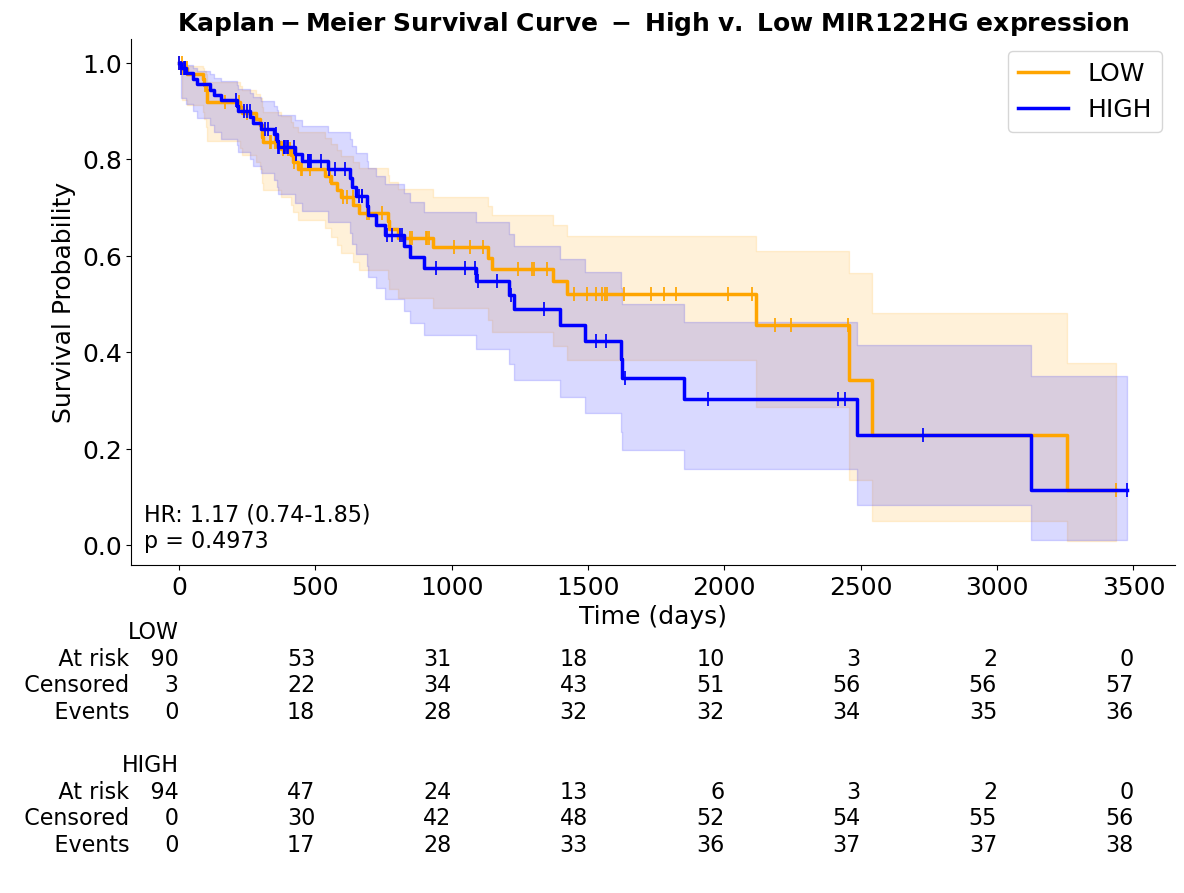


Summary Table:
  Group  Median Survival Time
0   LOW                2116.0
1  HIGH                1229.0

Hazard Ratio Summary:
Hazard ratio computed using Cox univariable regression on expression_group_num variable
   Hazard Ratio  95% CI Lower  95% CI Upper  P-value  Test Statistic
0          1.17          0.74          1.85  0.49734            0.68


Under the proportional hazards assumption, Cox regression is equivalent to log-rank test. See https://www.fharrell.com/post/logrank/ for more info.


In [31]:
import pysurv
pysurv.plot_km_curve(
    merge_survive_group, 
    time_col='OS_time', 
    event_col='OS_event', 
    group_col='expression_group_num', 
    group_labels=('LOW', 'HIGH'),
    title="Kaplan-Meier Survival Curve - High v. Low MIR122HG expression",
    y_label="Survival Probability",
    x_label="Time (days)",
    colors=['orange', 'blue'], 
    show_ci=True,
    return_summary=False,
    savepath='./KMCurve.svg'
)

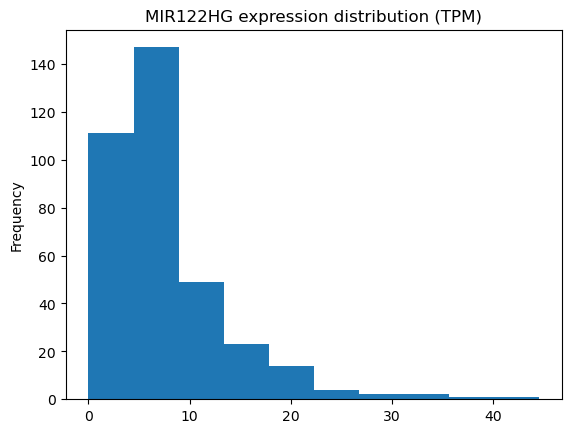

In [32]:
import matplotlib.pyplot as plt
ax = lnc122_expr["MIR122HG"].plot.hist()
ax.set_title('MIR122HG expression distribution (TPM)')
plt.show()